# Predictive Customer Segmentation and Classification in Supermarket Sales


## Project Overview

This project focuses on analyzing supermarket sales data to uncover insights into customer behavior, product sales trends, and revenue generation. It also leverages machine learning models to predict sales metrics, segment customers, and classify customer satisfaction ratings.

## Dataset Description

The dataset consists of sales transactions recorded across different branches of a supermarket. It includes various attributes such as invoice details, product line, customer demographics, payment method, purchase amount, and customer ratings.

In [1]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Reading Data

In [4]:
data = pd.read_csv('supermarket_sales - Sheet1.csv')
data.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [5]:
data.shape

(1000, 17)

## Data Cleaning and Preparation

In [6]:
#Checkin for null values
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

This indicates there are no null values in the data

In [7]:
#Checking the datatypes of attributes
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [17]:
data.describe()

Unit price     Quantity       Tax 5%        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      99.960000    10.000000    49.650000  1042.650000   
std      26.494628     2.923431    11.708825   245.885335   

                             Date        cogs  gross margin percentage  \
count                        1000  1000.00000             1.000000e+03   
mean   2019-02-14 00:05:45.600000   307.58738             4.761905e+00   
min           2019-01-01 00:00:00    10.17000             4.761905e+00   
25%           2019-01-24 00:00:00   118.49750             4.761905e+00   
50%           2019-02-13 00:00:00   241.76000             4.761905e+00   
75%           2019-03-08 00:00:00   448.90500             4.761905e+00   
max           2019-03-30 00:00:00   993.00000             4.761905e+00   
std                           NaN   234.17651             6.131498e-14   

       gross income      Rating        Month  
count   1000.000000  1000.00000  1000.000000  
mean      15.379369     6.97270     1.993000  
min        0.508500     4.00000     1.000000  
25%        5.924875     5.50000     1.000000  
50%       12.088000     7.00000     2.000000  
75%       22.445250     8.50000     3.000000  
max       49.650000    10.00000     3.000000  
std       11.708825     1.71858     0.835254

The above statistics shows us that,

- Unit prices range from 10.08 to 99.96, with an average price of 55.67. The data shows a wide spread (standard deviation: 26.49), indicating considerable variation in product pricing.

- On average, customers purchase 5.51 units per transaction, though this varies notably (standard deviation: 2.92), with most transactions involving between 3 and 8 items. 

- Total purchase amounts also show substantial variation, averaging 322.97, but occasionally reaching as high as 1,042.65.

The data is right-skewed, meaning a small number of high-value transactions significantly influence the averages. This reflects a diverse range of customer spending behaviors, from smaller, everyday purchases to larger bulk transactions.

## Feature Engineering

In [9]:
#Convert 'Date' and 'Time' columns to datetime format
data['Date'] = pd.to_datetime(data['Date'])

#Extract month and DayofWeel from 'Date' column
data['DayOfWeek'] = data['Date'].dt.day_name()
data['Month'] = data['Date'].dt.month

In [10]:
data.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29         Cash   76.40                 4.761905        3.8200     9.6   
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4   
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4   
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3   

  DayOfWeek  Month  
0  Saturday      1  
1    Friday      3  
2    Sunday      3  
3    Sunday      1  
4    Friday      2

## Exploratory Data Analysis

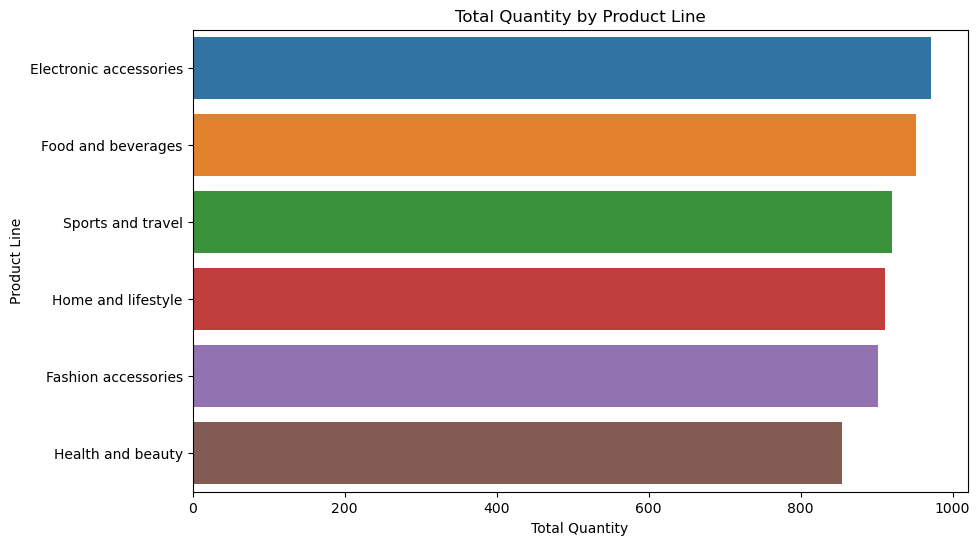

In [12]:
#Analysing the number of Quantity sold in each product line
result = (
    data.groupby('Product line')
    ['Quantity'].sum().sort_values(ascending=False).to_frame()
)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=result['Quantity'], y=result.index)

# Set labels and title
plt.xlabel('Total Quantity')
plt.ylabel('Product Line')
plt.title('Total Quantity by Product Line')

# Show the plot
plt.show()

#### The above bar plot shows the quanity sold in each product line. The most sold is in Electronics followed by food and beverages and the least being Health and beauty. 

#### Let dig some more into to see the purchase trend of male and female. 


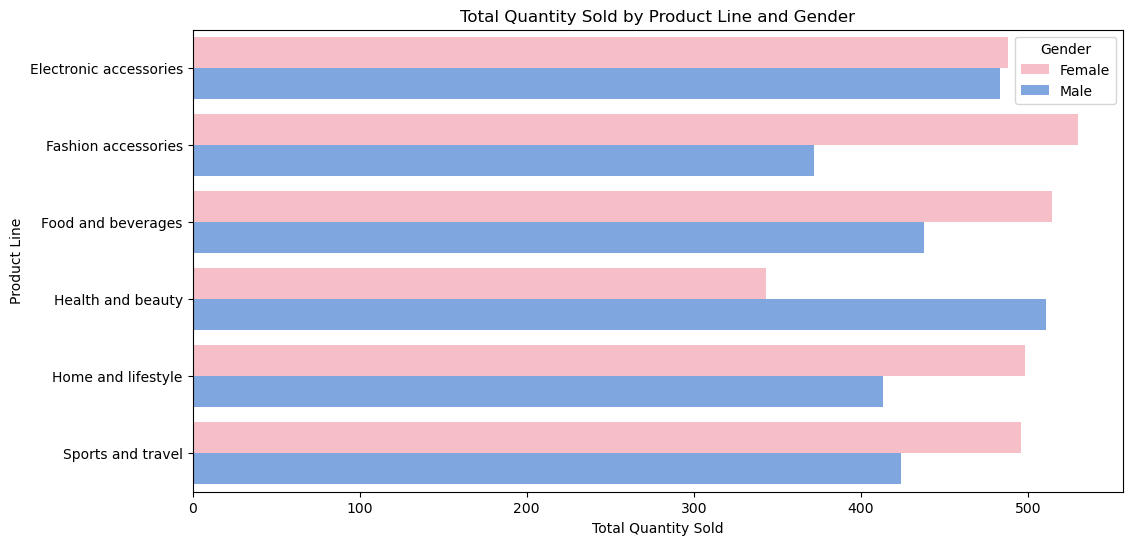

In [53]:
# Grouping data by Product line and Gender to see the quantity sold
result = data.groupby(['Product line', 'Gender'])['Quantity'].sum().reset_index()

# Create a bar plot with gender differentiation
plt.figure(figsize=(12, 6))

gender_colors = {'Female': '#ffb6c1', 'Male': '#6fa3ef'}

sns.barplot(x='Quantity', y='Product line', hue='Gender', data=result, palette=gender_colors)

# Set labels and title
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Line')
plt.title('Total Quantity Sold by Product Line and Gender')
plt.legend(title='Gender')

# Show the plot
plt.show()

#### Interestingly females have bought more electronics but the difference is not big than males. And males have bought more healt and beauty products. 

#### Females have shpped more than males in overall. 

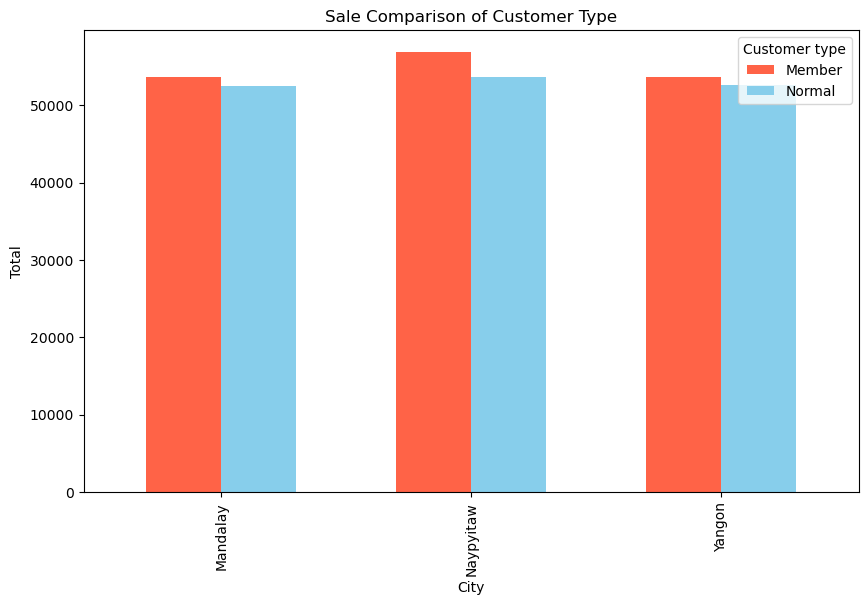

In [9]:
#Comparing the sale of each city for each customer type 
plt.figure(figsize=(10, 6))
ax = plt.axes()

#Grouping by 'City' and 'Customer type', then sum the 'Total' values
grouped_data = data.groupby(['City', 'Customer type'])['Total'].sum().unstack()

#Ploting the bar chart
grouped_data.plot(kind='bar', stacked=False, width=0.6, color=['#FF6347', '#87CEEB'], ax=ax)

plt.xlabel('City')
plt.ylabel('Total')
plt.title('Sale Comparison of Customer Type')
plt.show()

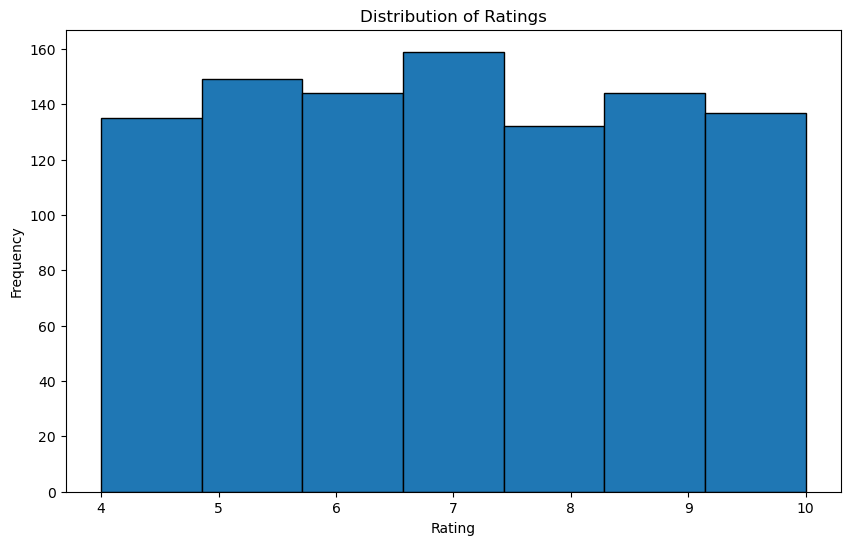

In [60]:
#Comparing the distribution of rating

plt.figure(figsize=(10, 6))
plt.hist(data['Rating'], bins=7, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [61]:
print(data['Rating'].describe())


count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64


### Analysing the top selling product in each city


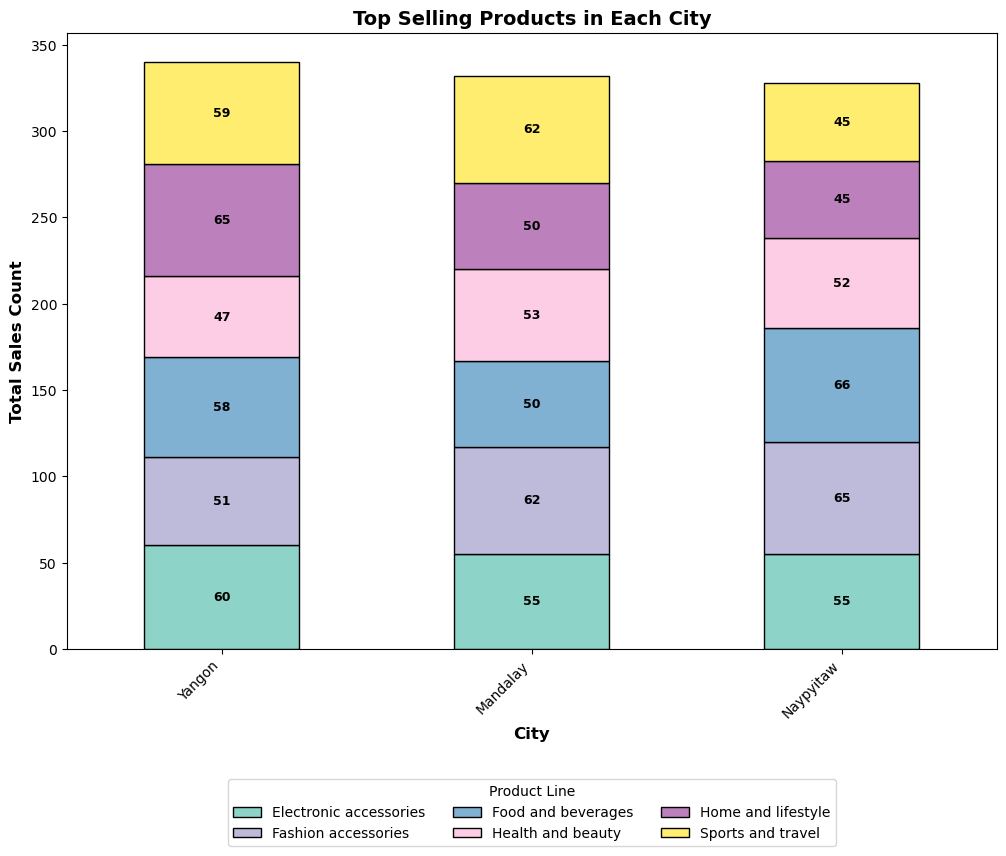

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
ax = plt.axes()

# Group by 'City' and 'Product line' and count occurrences
product_counts = data.groupby(['City', 'Product line']).size().unstack()

# Sort cities by total sales for better clarity
product_counts = product_counts.loc[product_counts.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart with a pastel color palette
ax = product_counts.plot(kind='bar', stacked=True, colormap='Set3', ax=ax, edgecolor='black')

# Label each segment with the sales count
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=9, color='black', weight='bold')

# Adjust legend position
ax.legend(title='Product Line', loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=3, fontsize=10)

# Improve labels & title
plt.xlabel('City', fontsize=12, weight='bold')
plt.ylabel('Total Sales Count', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('Top Selling Products in Each City', fontsize=14, weight='bold')

plt.show()


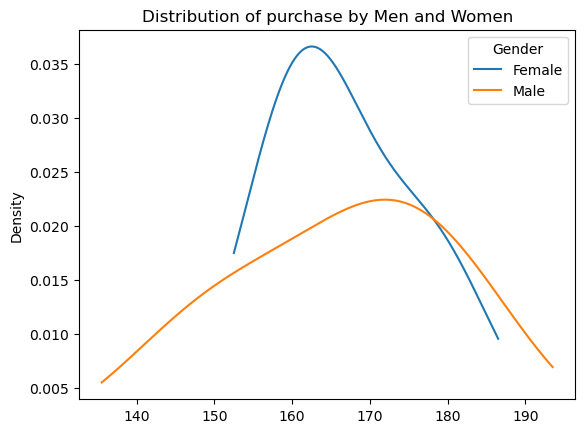

In [12]:
#Analysing the distribution of men and Women based on Costs of goods sold

pivot_table_data = data.pivot_table(index='Branch', columns='Gender', values='cogs', aggfunc='count')

ax = pivot_table_data.plot(kind='kde', title='Distribution of purchase by Men and Women')
plt.show()

## Model 1: Predicting Total Sales Amount using Linear Regression

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
#Copying the data
md1Data = data.copy()

#Feature Selection
features = ['Branch','Customer type', 'Product line', 'Unit price', 'DayOfWeek', 'Month','Quantity']

x = md1Data[features]
x.head()



Branch Customer type            Product line  Unit price DayOfWeek  Month  \
0      A        Member       Health and beauty       74.69  Saturday      1   
1      C        Normal  Electronic accessories       15.28    Friday      3   
2      A        Normal      Home and lifestyle       46.33    Sunday      3   
3      A        Member       Health and beauty       58.22    Sunday      1   
4      A        Normal       Sports and travel       86.31    Friday      2   

   Quantity  
0         7  
1         5  
2         7  
3         8  
4         7

In [80]:
dummy = pd.get_dummies(x).astype(int)
pd.set_option('display.max_rows',None)

dummy.columns


Index(['Unit price', 'Month', 'Quantity', 'Branch_A', 'Branch_B', 'Branch_C',
       'Customer type_Member', 'Customer type_Normal',
       'Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'DayOfWeek_Friday',
       'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday',
       'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday'],
      dtype='object')

In [81]:
x = dummy.to_numpy()
x

array([[74,  1,  7, ...,  0,  0,  0],
       [15,  3,  5, ...,  0,  0,  0],
       [46,  3,  7, ...,  0,  0,  0],
       ...,
       [31,  2,  1, ...,  0,  0,  0],
       [65,  2,  1, ...,  0,  0,  0],
       [88,  2,  7, ...,  0,  0,  0]])

In [82]:
#y = md1Data['Total']  #Target Attribute
y = md1Data['Total'].to_numpy().reshape(-1,1)


In [83]:
#Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#Model Training - Linear Regression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [84]:
# Prediction on the  set
y_pred = model.predict(x).astype(int)

#Evaluation
rSquare = r2_score(y,y_pred)

#Display results
print("R-squared:", rSquare)


R-squared: 0.8910666826468742


## Model 2: Predicting Customer Analysis using Random Forest Classifier

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV

#Load your dataset
# Assuming your dataset is named 'supermarket_data.csv'
data = pd.read_csv("supermarket_sales - Sheet1.csv.xls")

#Additional Feature Engineering
data['DayOfWeek'] = pd.to_datetime(data['Date']).dt.dayofweek
data['Month'] = pd.to_datetime(data['Date']).dt.month


#Dropping unwanted columns
data = data.drop(['Invoice ID', 'Date', 'Time', 'Gender', 'Customer type'], axis=1)

#Convert 'Rating' to categories
bins = [0, 4, 7, 10]
labels = ['low', 'medium', 'high']
data['RatingCategory'] = pd.cut(data['Rating'], bins=bins, labels=labels)


In [21]:
#Separating features and target variable
X = data.drop(['Rating', 'RatingCategory'], axis=1)
y = data['RatingCategory']

#Categorical features
categorical = ['Branch', 'Product line', 'Payment']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(), X.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(), categorical)
    ])

#Random forest classification
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('scaler', StandardScaler()),  # Adding StandardScaler
                        ('classifier', RandomForestClassifier(random_state=42))])


In [22]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],  # Added min_samples_split
    'classifier__min_samples_leaf': [1, 2, 4]  # Added min_samples_leaf
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Getting the best model from the grid search
best_model = grid_search.best_estimator_

#Making predictions on the test set
y_pred = best_model.predict(X_test)

#Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

#Displaying classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.52
              precision    recall  f1-score   support

        high       0.50      0.47      0.49        95
         low       0.00      0.00      0.00         3
      medium       0.54      0.58      0.56       102

    accuracy                           0.52       200
   macro avg       0.35      0.35      0.35       200
weighted avg       0.51      0.52      0.51       200



/Users/suriya/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suriya/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/suriya/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 3: Customer Segmentation using K-Means Clustering


In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score



In [24]:
file_path = "supermarket_sales - Sheet1.csv.xls"
data = pd.read_csv(file_path)

# Drop irrelevant columns
data_processed = data.drop(columns=['Invoice ID', 'Date'], axis=1)

# Check statistical summary
print("\nStatistical summary of the dataset:")
print(data_processed.describe())




Statistical summary of the dataset:
        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%       

In [25]:
# Identify categorical variables
categorical_columns = (data_processed.dtypes == 'object')
categorical_columns_list = list(categorical_columns[categorical_columns].index)
print(f'\nThe categorical variables are: {categorical_columns_list}')




The categorical variables are: ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Time', 'Payment']


In [26]:
# Ordinal encoding for categorical variables
ordinal_encoder = OrdinalEncoder()
data_encoded = data_processed.copy()
data_encoded[categorical_columns_list] = ordinal_encoder.fit_transform(data_encoded[categorical_columns_list])

# Display the first 3 rows after encoding
print("\nFirst 3 rows after ordinal encoding:")
print(data_encoded.head(3))




First 3 rows after ordinal encoding:
   Branch  City  Customer type  Gender  Product line  Unit price  Quantity  \
0     0.0   2.0            0.0     0.0           3.0       74.69         7   
1     2.0   1.0            1.0     0.0           0.0       15.28         5   
2     0.0   2.0            1.0     1.0           4.0       46.33         7   

    Tax 5%     Total   Time  Payment    cogs  gross margin percentage  \
0  26.1415  548.9715  146.0      2.0  522.83                 4.761905   
1   3.8200   80.2200   23.0      0.0   76.40                 4.761905   
2  16.2155  340.5255  155.0      1.0  324.31                 4.761905   

   gross income  Rating  
0       26.1415     9.1  
1        3.8200     9.6  
2       16.2155     7.4  


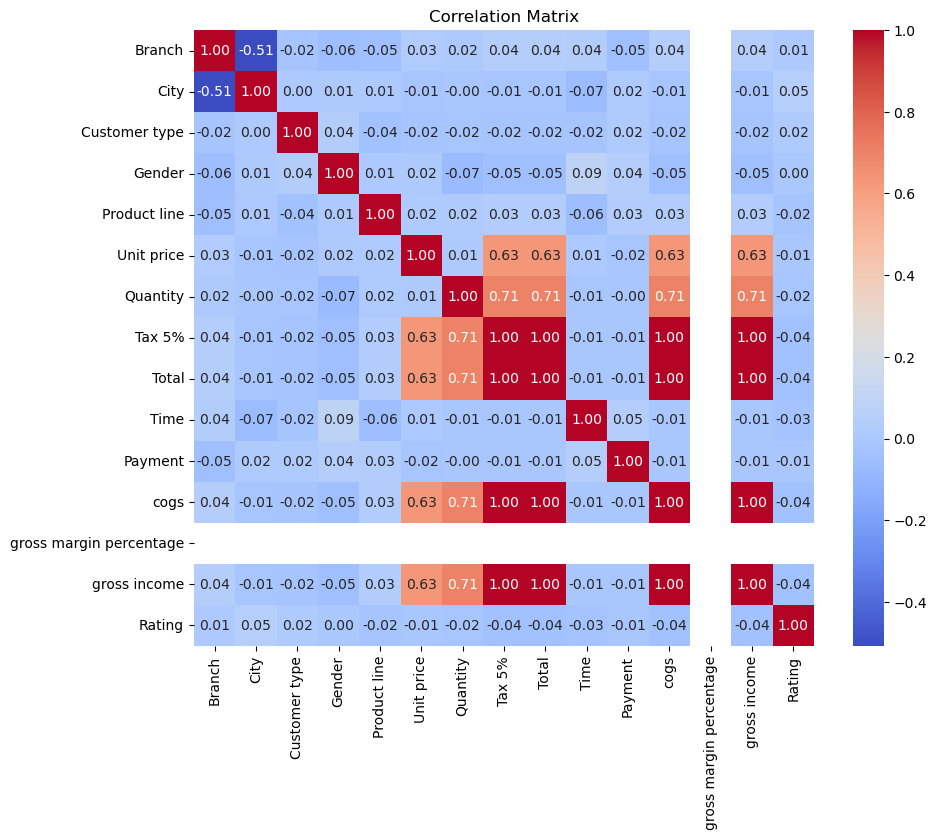

In [27]:
# Exploratory Data Analysis (EDA)
# Visualize the correlation matrix
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



/Users/suriya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


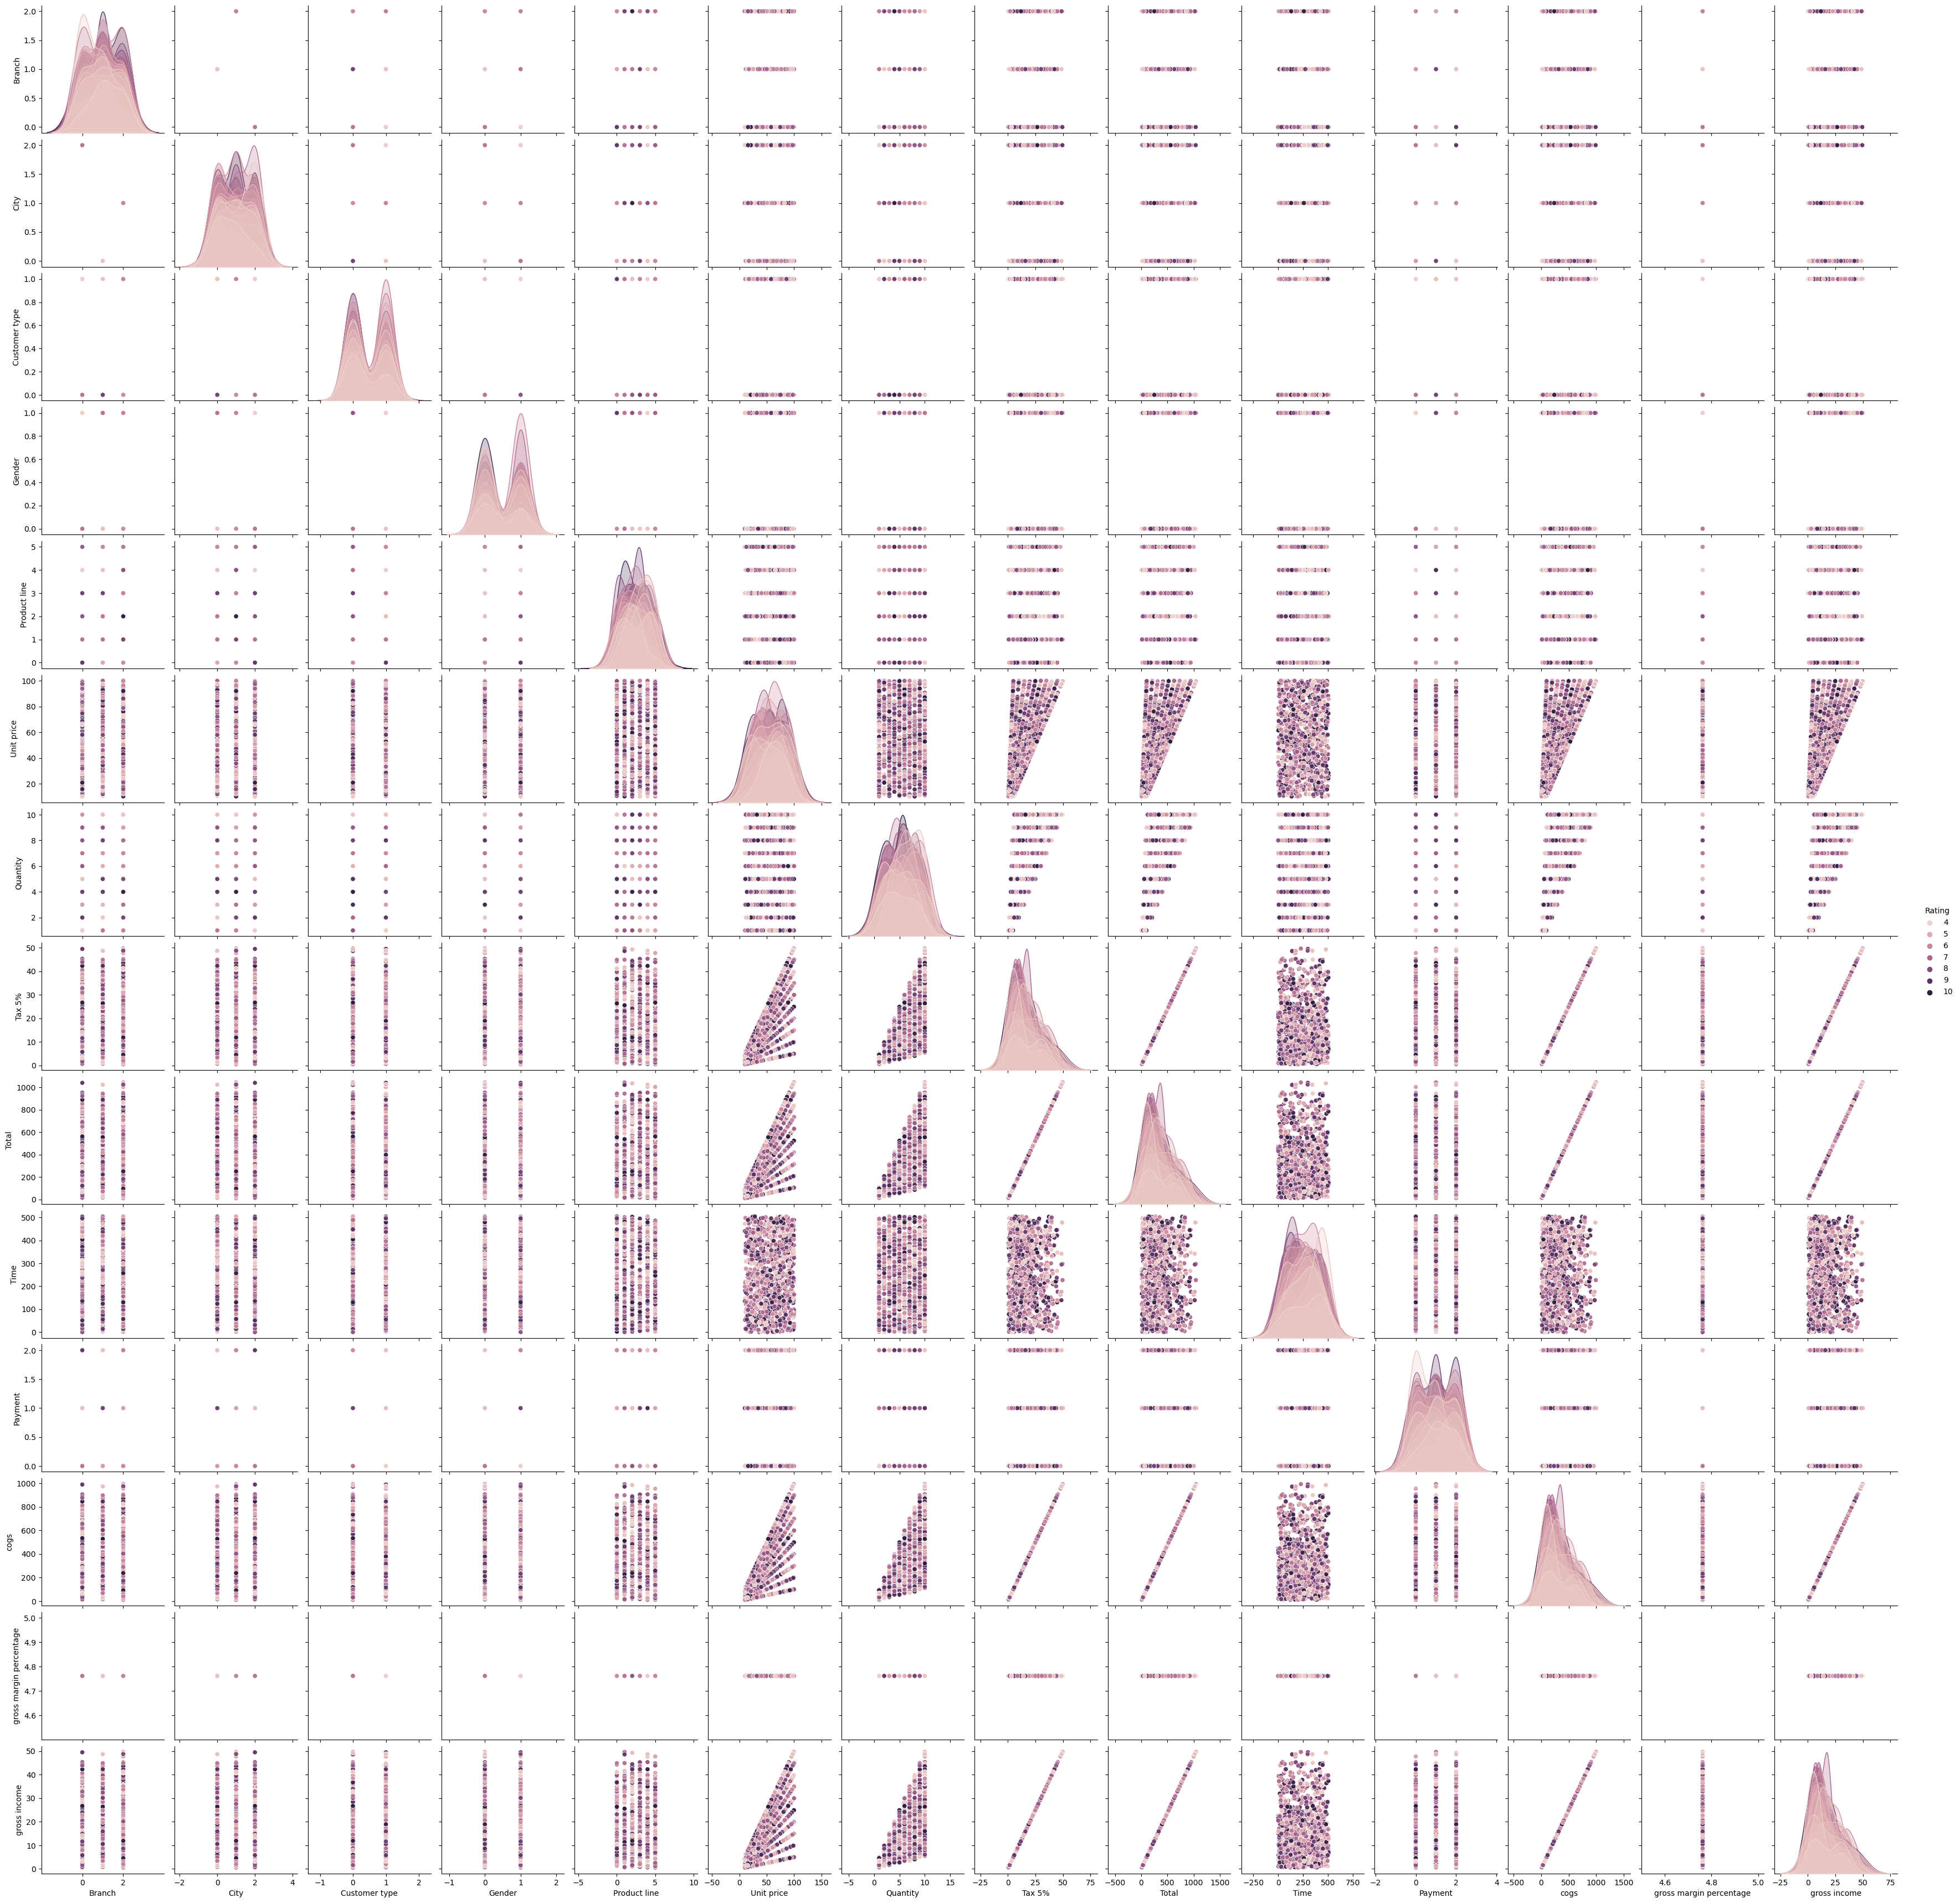

In [28]:
# Pairplot for visualizing relationships in the data
sns.pairplot(data_encoded, hue='Rating')
plt.show()



In [29]:
# K-Means Clustering for Customer Segmentation
# Feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)



In [30]:
# Determine the optimal number of clusters using the Elbow method
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)



/Users/suriya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suriya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suriya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suriya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

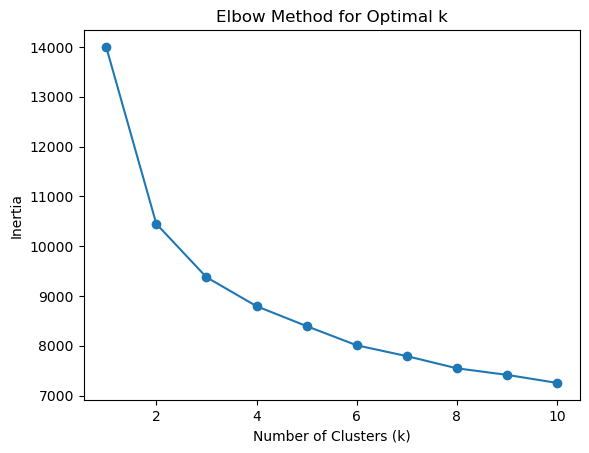

In [31]:
# Plot the Elbow method
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()




In [32]:
# Based on the Elbow method, let's choose k=3
# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(data_scaled)



/Users/suriya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [33]:
# Check for constant features
constant_features = data_encoded.columns[data_encoded.nunique() == 1]
if len(constant_features) > 0:
    print(f"Removing constant features: {constant_features}")
    data_encoded = data_encoded.drop(columns=constant_features)

# Check for highly correlated features
correlation_matrix = data_encoded.corr()
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:  # You can adjust the correlation threshold
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

if len(highly_correlated_features) > 0:
    print(f"Removing highly correlated features: {highly_correlated_features}")
    data_encoded = data_encoded.drop(columns=highly_correlated_features)





Removing constant features: Index(['gross margin percentage'], dtype='object')
Removing highly correlated features: {'Total', 'gross income', 'cogs'}


/Users/suriya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


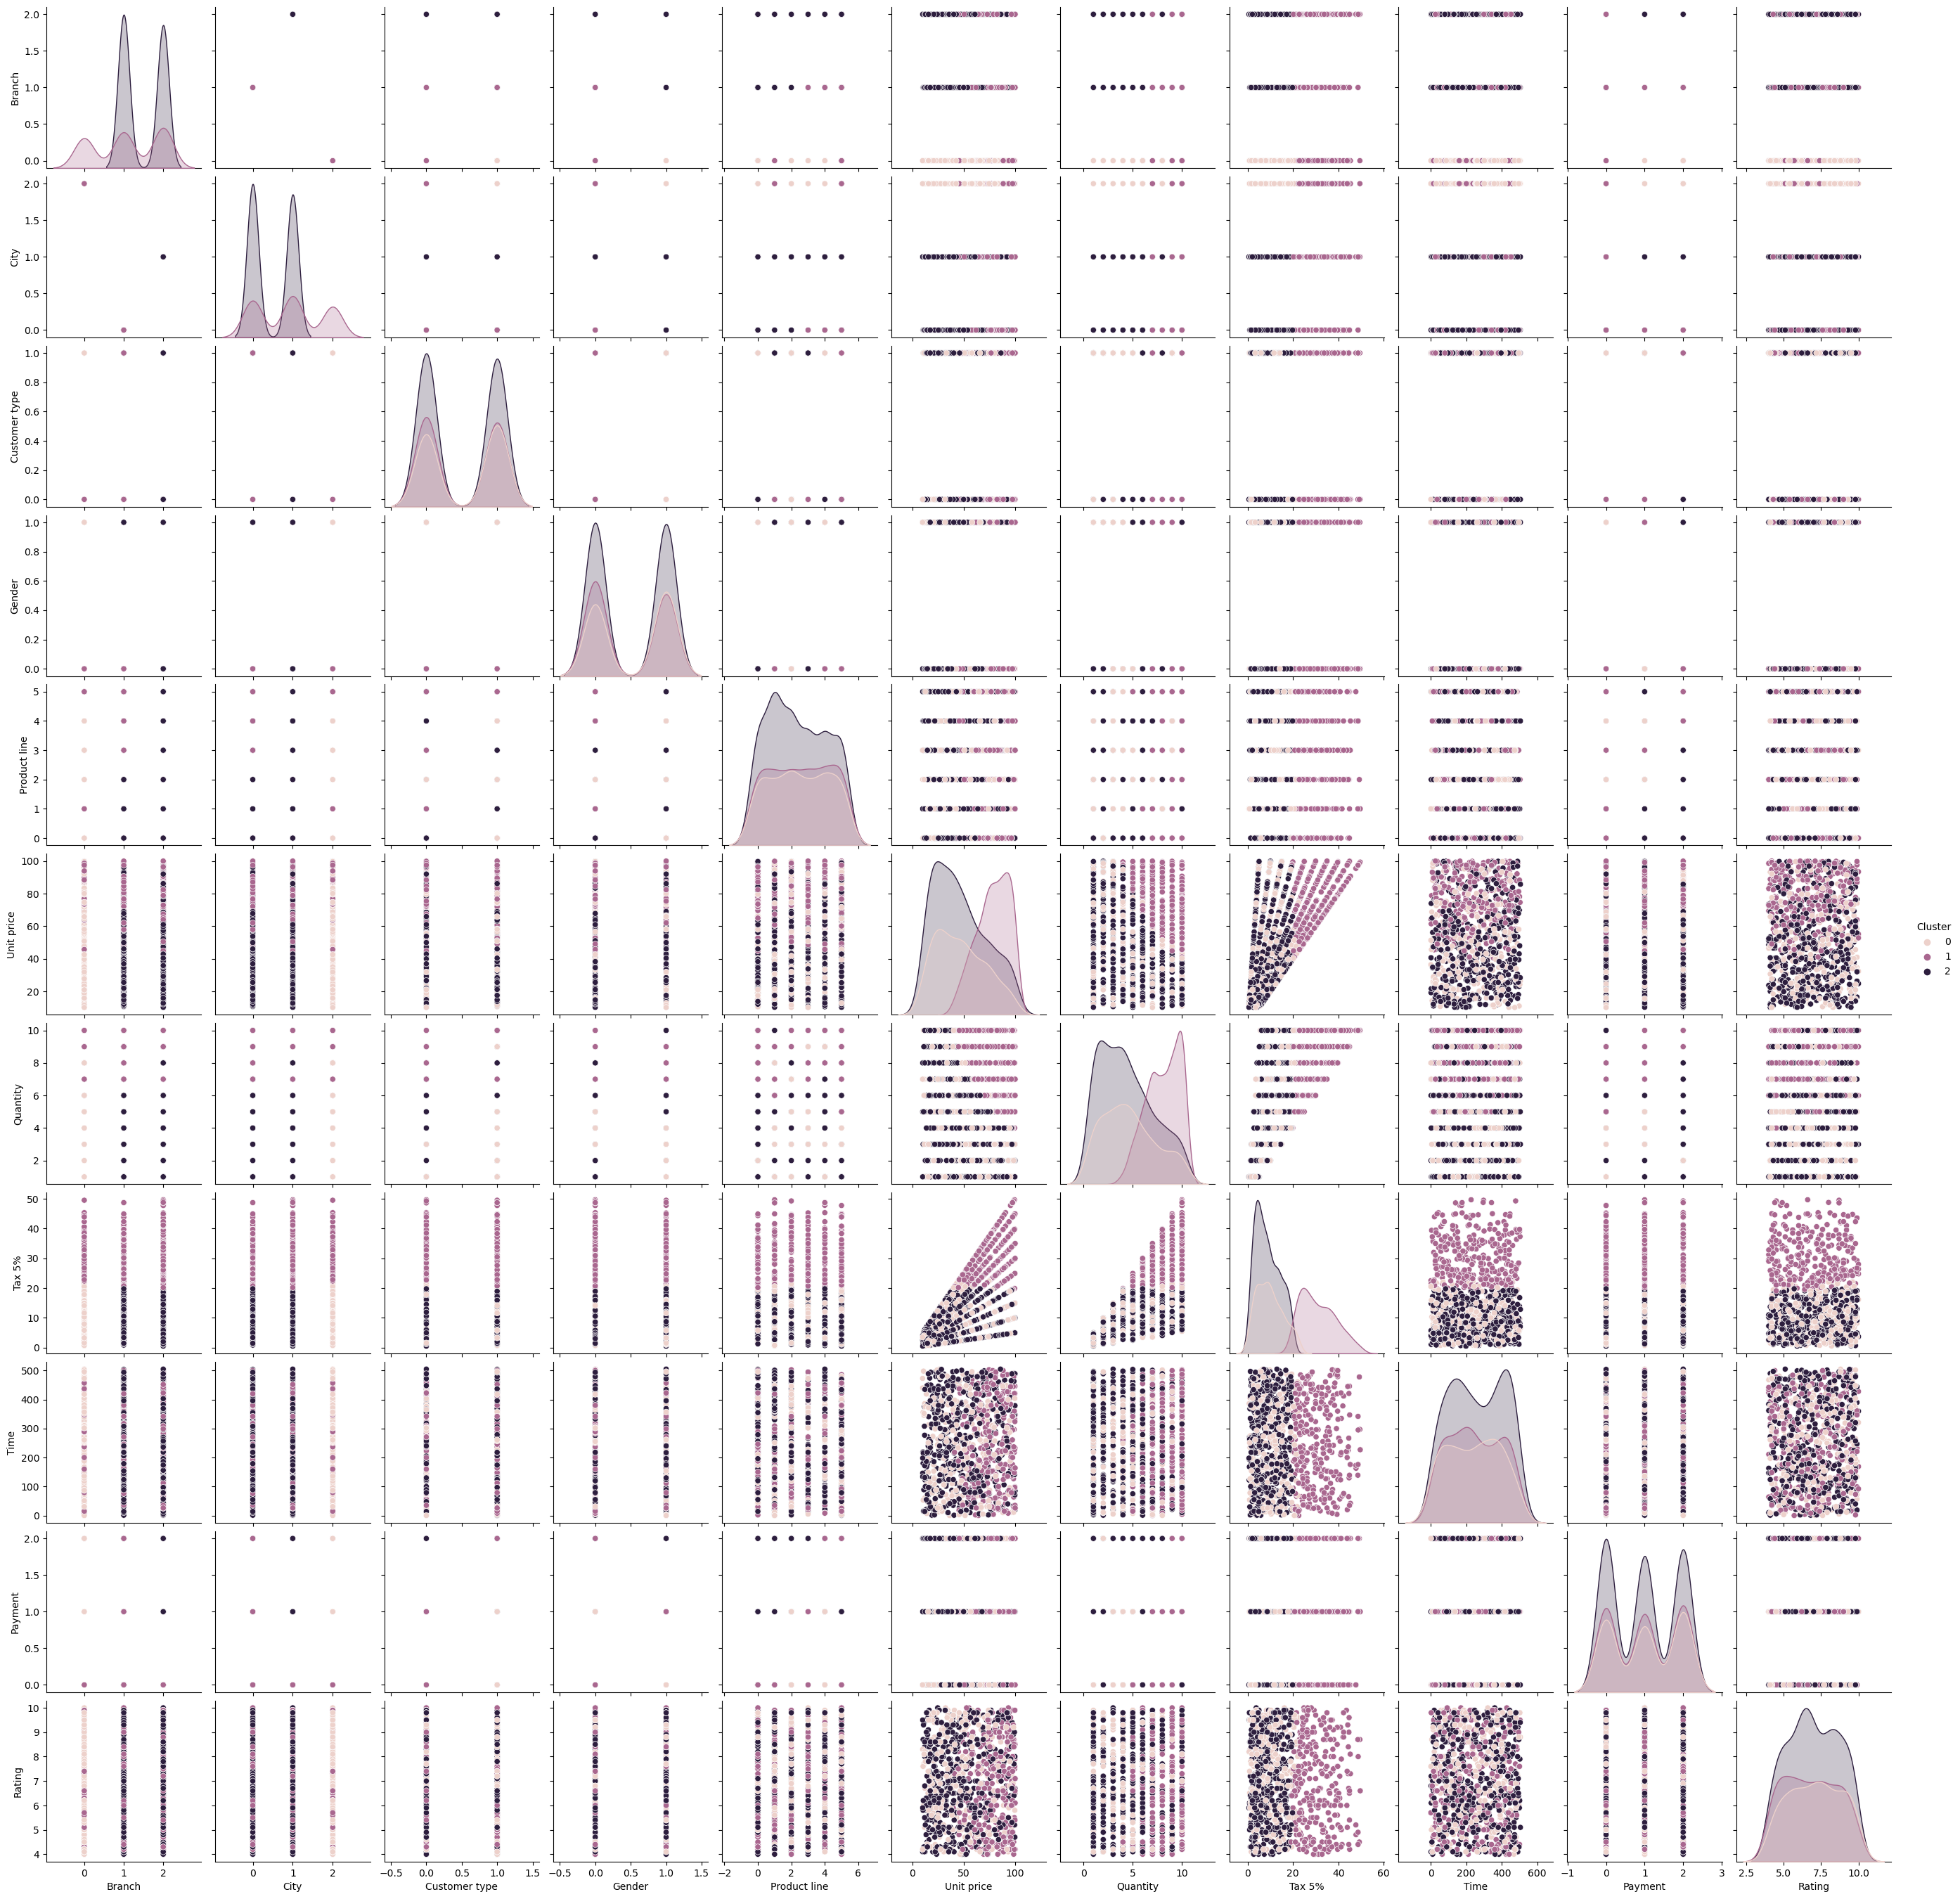

In [34]:
# Assuming 'labels' is the array of cluster labels obtained from K-means clustering
data_encoded['Cluster'] = labels
# Pairplot for visualizing relationships in the clustered data
sns.pairplot(data_encoded, hue='Cluster')
plt.show()


In [35]:

# Calculating silhouette, Davies Bouldin, and Calinski-Harabasz scores for evaluation
silhouette = silhouette_score(data_scaled, labels)
dbs = davies_bouldin_score(data_scaled, labels)
calinski = calinski_harabasz_score(data_scaled, labels)
print(f'\nSilhouette Score: {silhouette:.2f}')
print(f'Davies Bouldin Score: {dbs:.2f}')
print(f'Calinski-Harabasz Score: {calinski:.2f}')




Silhouette Score: 0.17
Davies Bouldin Score: 2.00
Calinski-Harabasz Score: 245.74


In [36]:
# Display the segmentation
cluster_description = data_encoded.groupby('Cluster').mean()
print("\nCluster Description:")
print(cluster_description)



Cluster Description:
           Branch      City  Customer type    Gender  Product line  \
Cluster                                                              
0        0.000000  2.000000       0.528958  0.540541      2.501931   
1        1.097561  0.944251       0.484321  0.463415      2.536585   
2        1.482379  0.482379       0.491189  0.497797      2.370044   

         Unit price  Quantity     Tax 5%        Time   Payment    Rating  
Cluster                                                                   
0         46.941158  4.667954   9.700568  240.698842  1.034749  7.086486  
1         78.159373  8.069686  31.047807  247.707317  1.010453  6.833798  
2         46.437511  4.372247   8.714100  259.345815  0.975771  6.995595  


Available columns in data_encoded:
Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Time', 'Payment', 'Rating',
       'Cluster'],
      dtype='object')


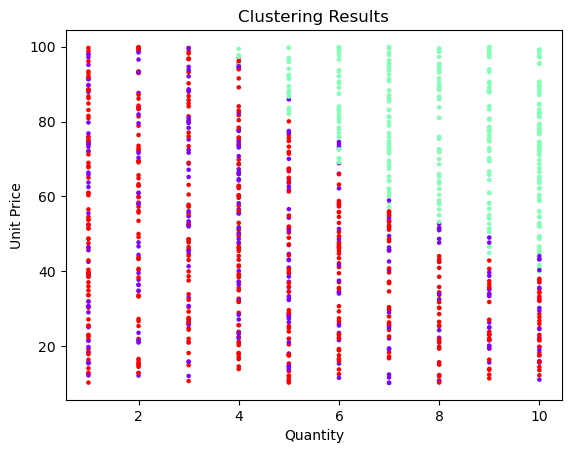

In [37]:
# Check available column names
print("Available columns in data_encoded:")
print(data_encoded.columns)

# Visualize clustering results
plt.scatter(data_encoded['Quantity'], data_encoded['Unit price'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Clustering Results')
plt.show()


## Model 4: Predicting Quantity using Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Separate target variable and features
X = data.drop(columns="Quantity")
y = data['Quantity']

#Identify numeric and categorical columns
num_col = X.select_dtypes(['float64', 'int64']).columns
cat_col = X.select_dtypes(['object']).columns

#Create a preprocessor
num_trans = Pipeline(steps=[("standard", StandardScaler())])
cat_trans = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[
    ('numeric', num_trans, num_col),
    ('category', cat_trans, cat_col)
])

#Create a decision tree pipeline
pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier())
])

scores = cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_absolute_error')
mae = -scores.mean()
print("Mean absolute error:", mae)


Mean absolute error: 0.27
